# Predicting Total Purchase Amount from Consumer Behavior

This project involves analyzing and predicting the total purchase amount using the "Consumer Behavior and Shopping Habits Dataset" from Kaggle. The goal is to clean and preprocess the data, perform statistical analysis to uncover which variables have the most significant impact on total purchase amount, and build a predictive model. This is a regression problem because the target variable, total purchase amount, is continuous. The focus is on predicting this value based on various input features, such as consumer demographics and shopping habits.








In [116]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pointbiserialr, f_oneway
import tensorflow as tf
import os

In [117]:
current_path = os.getcwd()
print(current_path)

/home/jovyan/Consumer-Purchase-Predictive-Model


In [118]:
# read in the dataset
consumer_dataset = pd.read_csv("/home/jovyan/Consumer-Purchase-Predictive-Model/shopping_behavior_updated.csv")

## Basic Info about consumer Dataset

In [119]:
consumer_dataset.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

In [120]:
consumer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [121]:
# check for null values
null_values = consumer_dataset.isnull().sum()
null_values

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [122]:
# check each variables data types
consumer_dataset.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [123]:
#get stats
consumer_dataset.describe().T

count         mean          std   min     25%     50%  \
Customer ID            3900.0  1950.500000  1125.977353   1.0  975.75  1950.5   
Age                    3900.0    44.068462    15.207589  18.0   31.00    44.0   
Purchase Amount (USD)  3900.0    59.764359    23.685392  20.0   39.00    60.0   
Review Rating          3900.0     3.749949     0.716223   2.5    3.10     3.7   
Previous Purchases     3900.0    25.351538    14.447125   1.0   13.00    25.0   

                           75%     max  
Customer ID            2925.25  3900.0  
Age                      57.00    70.0  
Purchase Amount (USD)    81.00   100.0  
Review Rating             4.40     5.0  
Previous Purchases       38.00    50.0

In [124]:
# check the values for each variable
for variable in consumer_dataset:
    print(variable)
    print(consumer_dataset[variable].sort_values().unique())
    print("")


Customer ID
[   1    2    3 ... 3898 3899 3900]

Age
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70]

Gender
['Female' 'Male']

Item Purchased
['Backpack' 'Belt' 'Blouse' 'Boots' 'Coat' 'Dress' 'Gloves' 'Handbag'
 'Hat' 'Hoodie' 'Jacket' 'Jeans' 'Jewelry' 'Pants' 'Sandals' 'Scarf'
 'Shirt' 'Shoes' 'Shorts' 'Skirt' 'Sneakers' 'Socks' 'Sunglasses'
 'Sweater' 'T-shirt']

Category
['Accessories' 'Clothing' 'Footwear' 'Outerwear']

Purchase Amount (USD)
[ 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100]

Location
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' '

## Data Cleaning
- Handles outliers
- Drop unique identifier
- Convert data types
- Encode categorical variables

### Handle Outliers

In [125]:
custom_percentiles = [0.01,0.05,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
consumer_dataset.describe(percentiles=custom_percentiles).T


count         mean          std   min     1%      5%  \
Customer ID            3900.0  1950.500000  1125.977353   1.0  39.99  195.95   
Age                    3900.0    44.068462    15.207589  18.0  18.00   20.00   
Purchase Amount (USD)  3900.0    59.764359    23.685392  20.0  20.00   23.00   
Review Rating          3900.0     3.749949     0.716223   2.5   2.50    2.60   
Previous Purchases     3900.0    25.351538    14.447125   1.0   1.00    3.00   

                         10%    20%     30%     40%     50%     60%     70%  \
Customer ID            390.9  780.8  1170.7  1560.6  1950.5  2340.4  2730.3   
Age                     23.0   28.0    33.0    39.0    44.0    49.0    55.0   
Purchase Amount (USD)   27.0   35.0    43.0    51.0    60.0    68.0    76.0   
Review Rating            2.8    3.0     3.3     3.5     3.7     4.0     4.2   
Previous Purchases       5.0   10.0    15.0    20.0    25.0    30.0    35.0   

                          80%     90%      95%      99%     max  
Customer ID            3120.2  3510.1  3705.05  3861.01  3900.0  
Age                      60.0    65.0    68.00    70.00    70.0  
Purchase Amount (USD)    84.0    93.0    96.05    99.00   100.0  
Review Rating             4.5     4.7     4.90     5.00     5.0  
Previous Purchases       40.0    46.0    48.00    50.00    50.0

No numeric variable extreme outliers, so need to drop anything.

In [126]:
#create a copy of the dataset to create changes
cd_edited = consumer_dataset.copy()

#drop customer id because it is a unique identifier and has no predictive power
cd_edited.drop("Customer ID", axis = 1, inplace= True)

In [127]:
#convert objects to categories
for variable in cd_edited:
    if cd_edited[variable].dtypes == "object":
        cd_edited[variable].astype('category')
        

In [128]:
#encode category ids with label encoder
le = LabelEncoder()
for variable in cd_edited:
    if cd_edited[variable].dtypes == "object":
        le.fit(cd_edited[variable])
        cd_edited[variable] = le.transform(cd_edited[variable])
        

In [129]:
#check to see changes stuck
cd_edited.head()

Age  Gender  Item Purchased  Category  Purchase Amount (USD)  Location  \
0   55       1               2         1                     53        16   
1   19       1              23         1                     64        18   
2   50       1              11         1                     73        20   
3   21       1              14         2                     90        38   
4   45       1               2         1                     49        36   

   Size  Color  Season  Review Rating  Subscription Status  Shipping Type  \
0     0      7       3            3.1                    1              1   
1     0     12       3            3.1                    1              1   
2     2     12       1            3.1                    1              2   
3     1     12       1            3.5                    1              3   
4     1     21       1            2.7                    1              2   

   Discount Applied  Promo Code Used  Previous Purchases  Payment Method  \
0                 1                1                  14               5   
1                 1                1                   2               1   
2                 1                1                  23               2   
3                 1                1                  49               4   
4                 1                1                  31               4   

   Frequency of Purchases  
0                       3  
1                       3  
2                       6  
3                       6  
4                       0

## Visualizations and Exploratory Data Analysis
- Visualizations of target variable, numerical variables, and categorical variables
- Scatterplots for correlations
- Correlation analysis

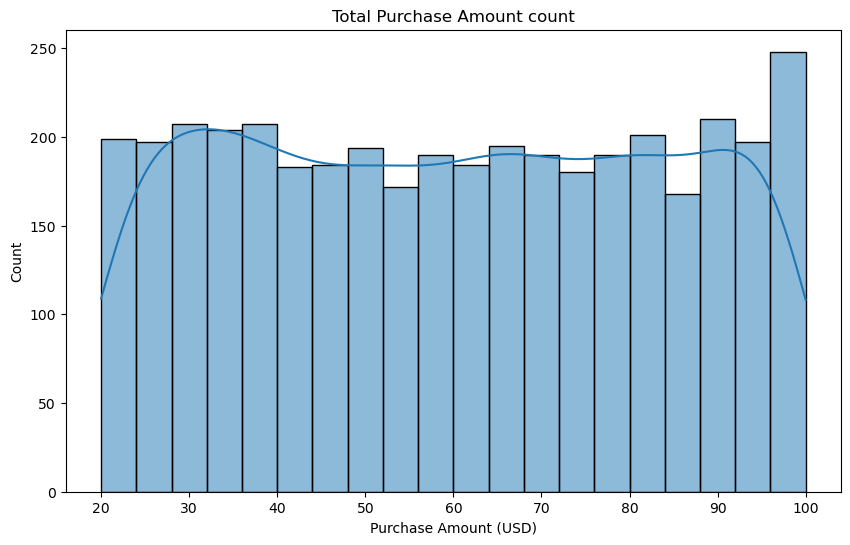

In [130]:
#visualization of target variable 
plt.figure(figsize = (10, 6))
sns.histplot(cd_edited['Purchase Amount (USD)'], bins = 20, kde = True)
plt.title("Total Purchase Amount count")
plt.show()

The target variable has an even distribution from 20 to 90 dollars with it being a touch higher at 100 dollars.

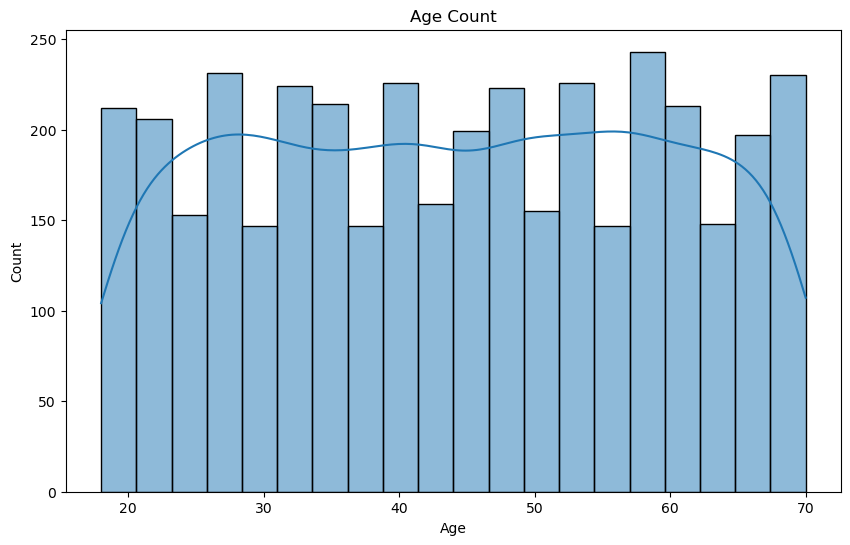

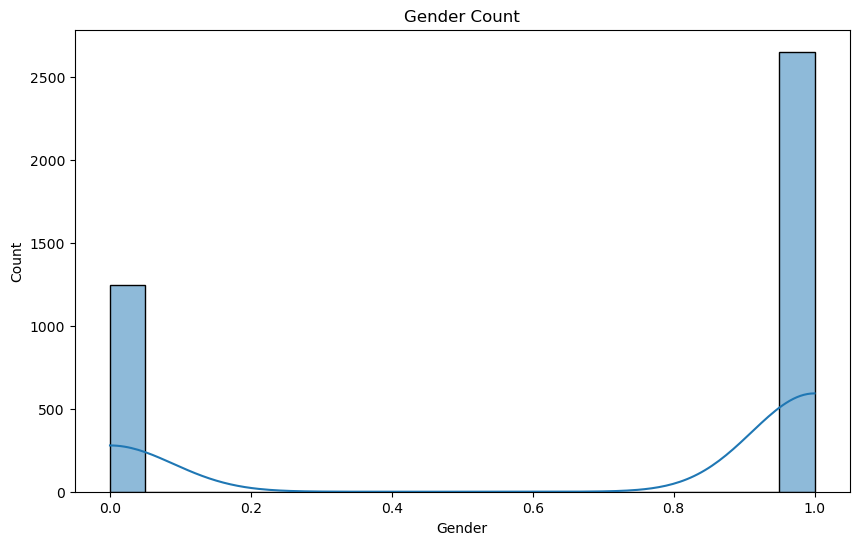

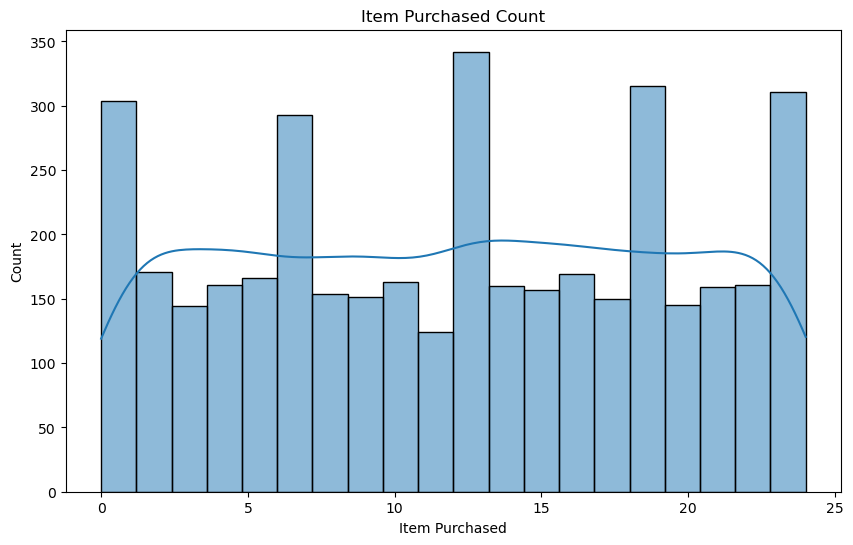

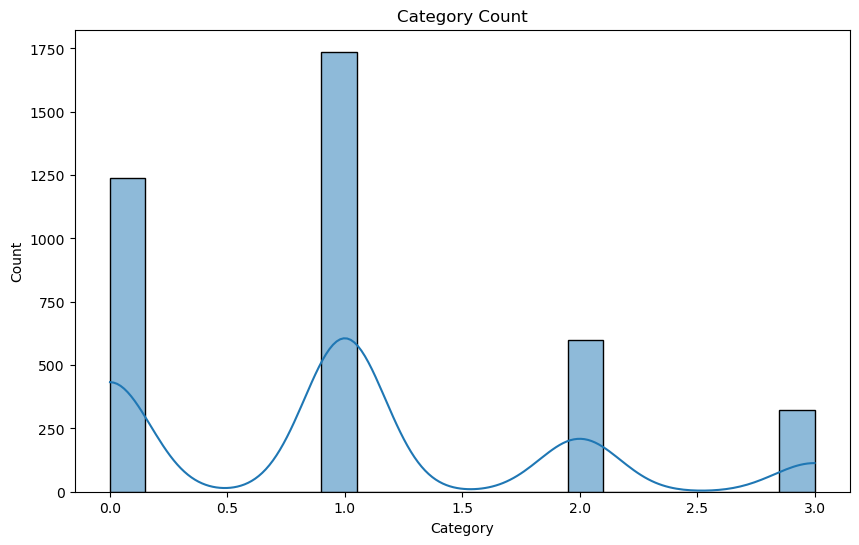

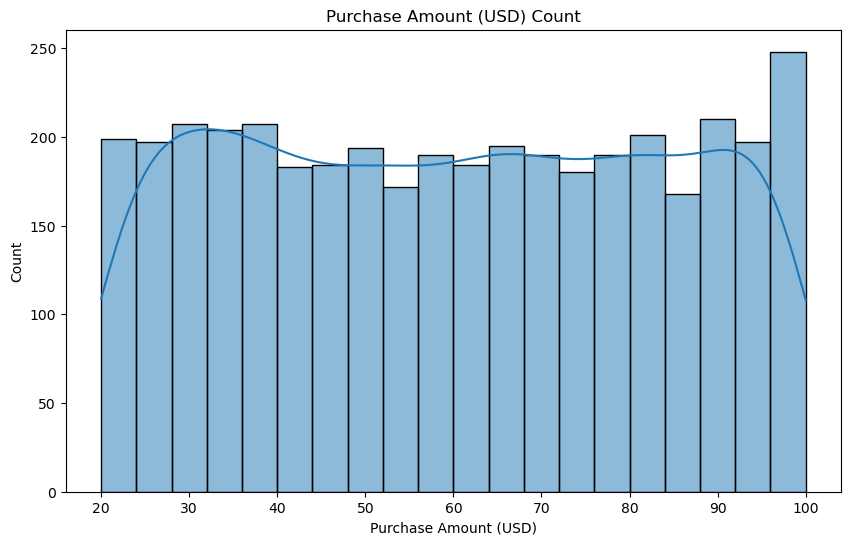

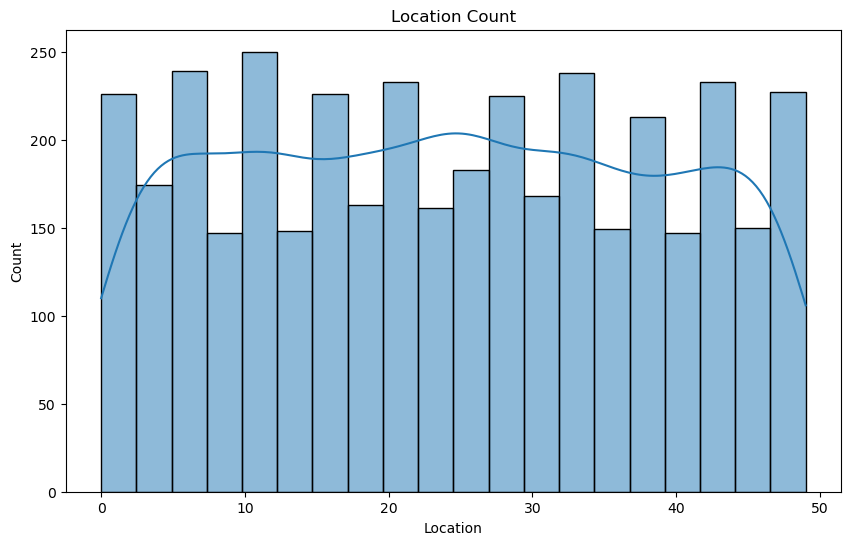

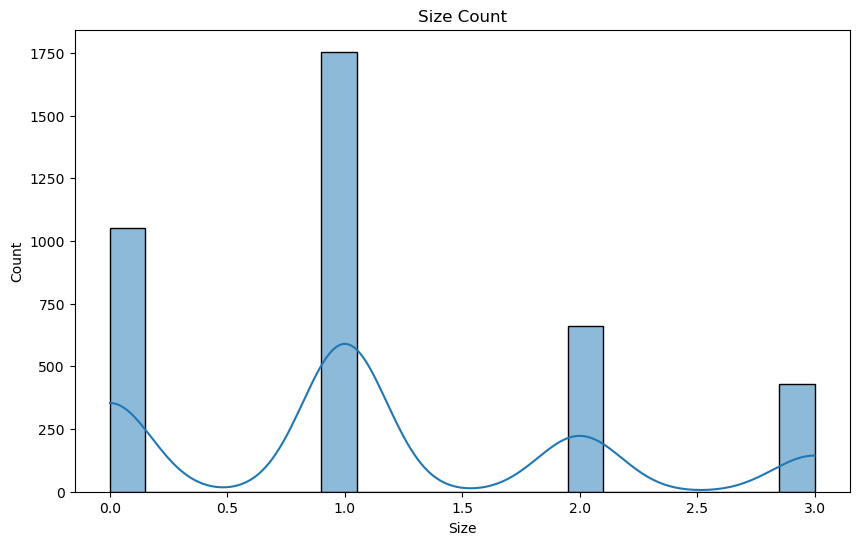

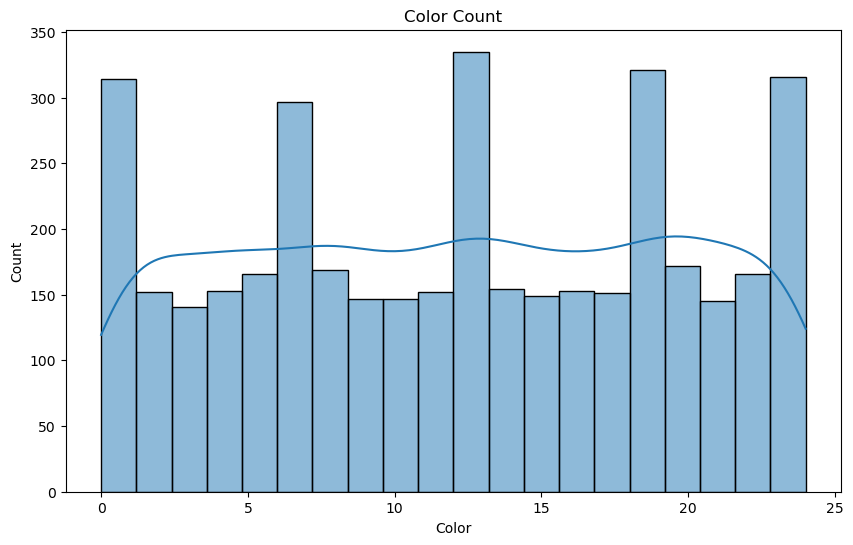

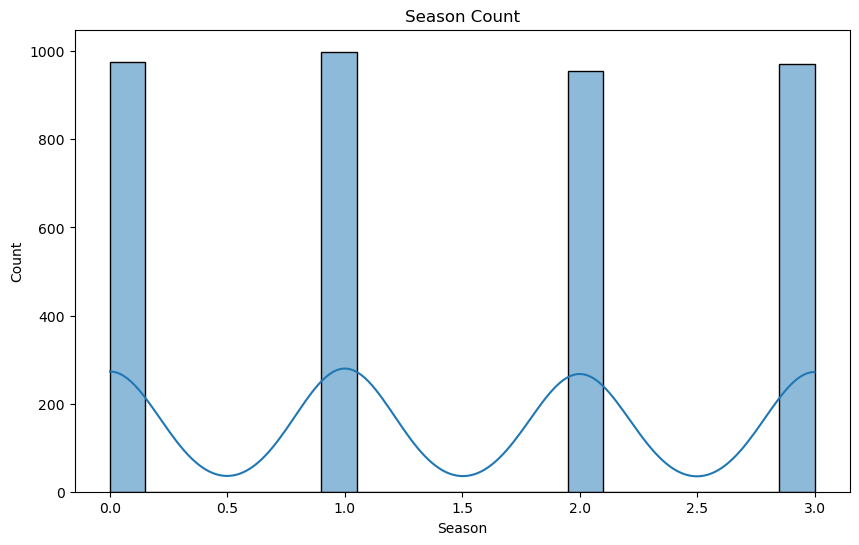

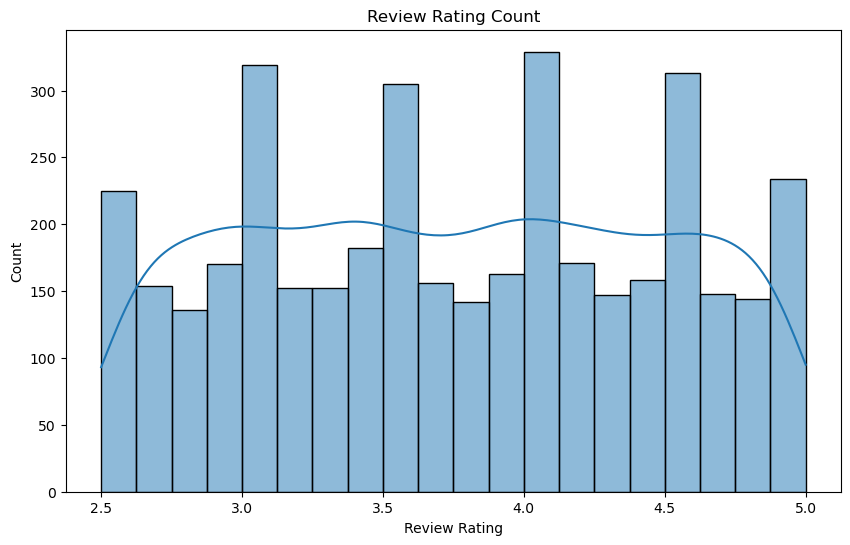

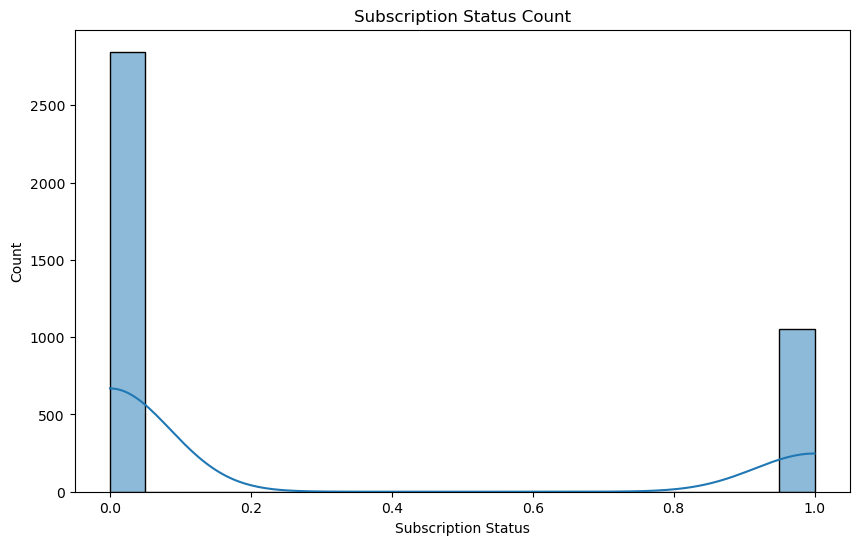

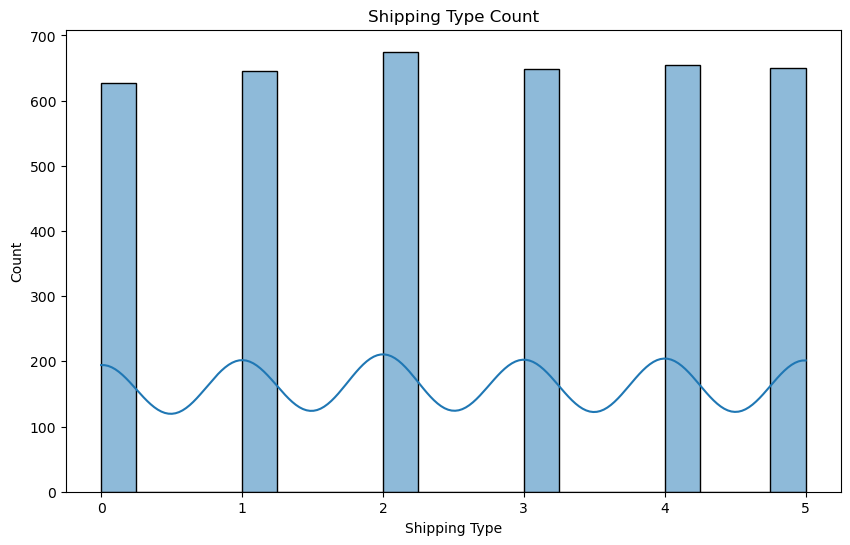

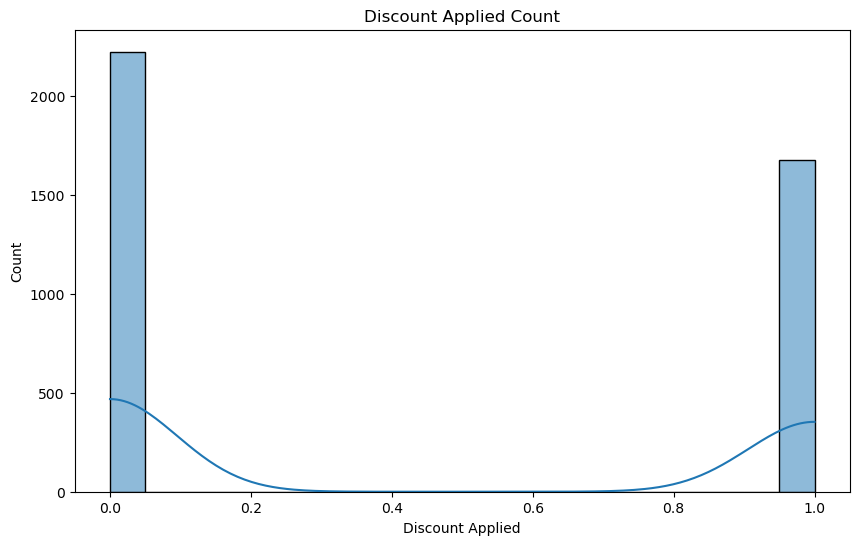

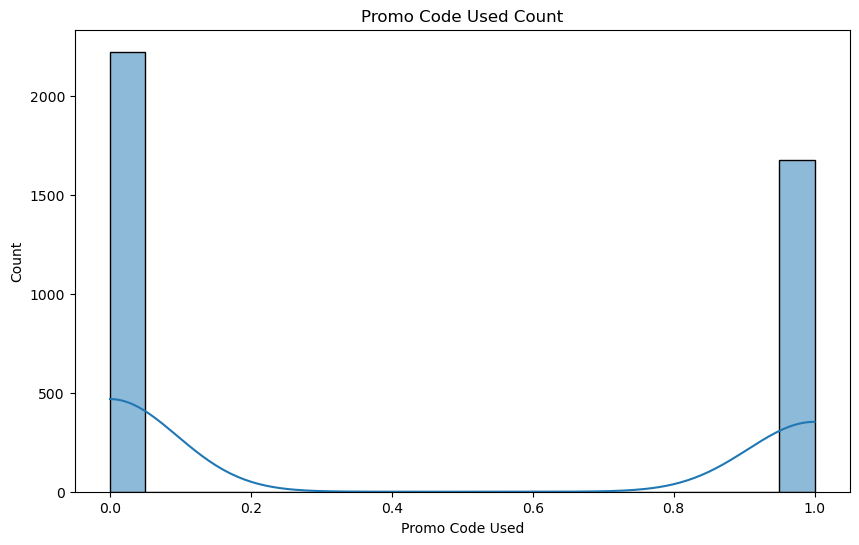

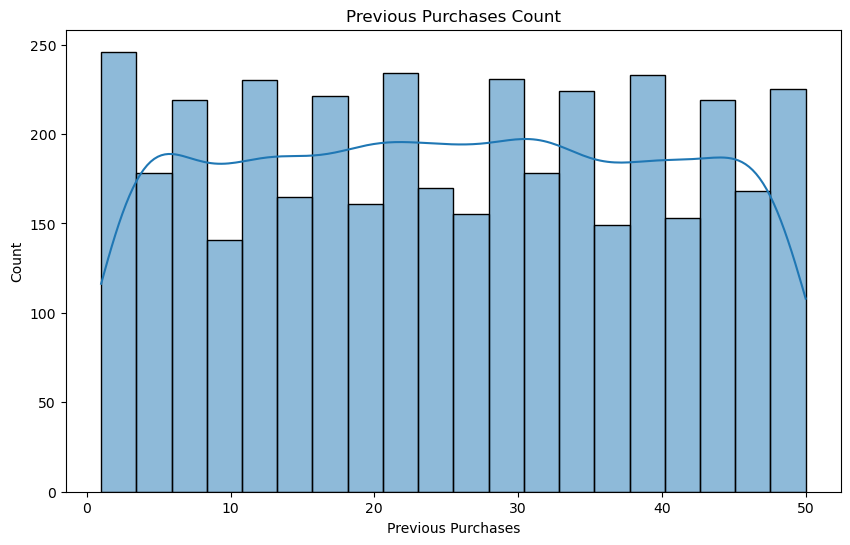

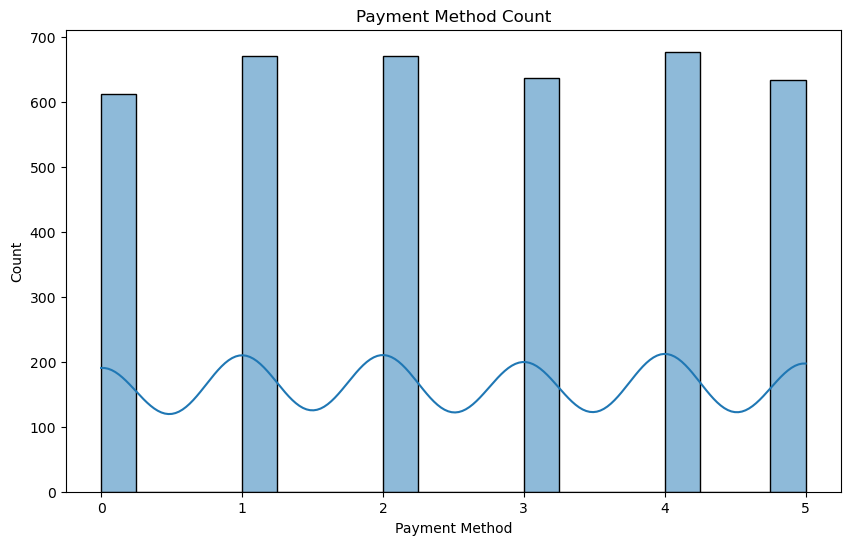

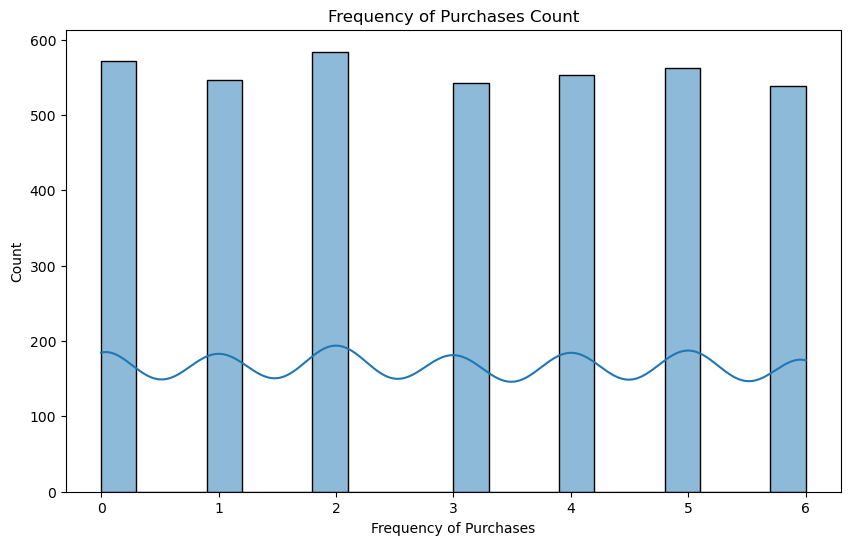

In [131]:
#plot all numeric variables in a bar plot to show the counts of each
for variable in cd_edited:
    plt.figure(figsize = (10, 6))
    sns.histplot(cd_edited[variable], bins = 20, kde = True)
    plt.title(f'{variable} Count')
    plt.show()

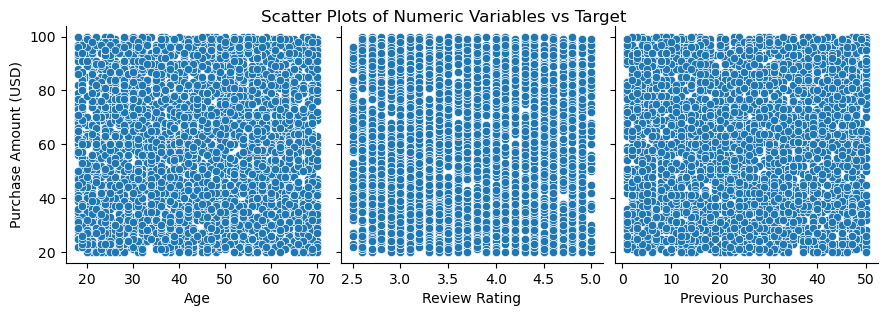

In [132]:
#pairplot to show any correlations against the target variable visually
numeric_variables = ['Age', 'Review Rating', 'Previous Purchases']
sns.pairplot(cd_edited, x_vars=numeric_variables, y_vars='Purchase Amount (USD)', height=3, aspect=1)
plt.suptitle('Scatter Plots of Numeric Variables vs Target', y=1.02)  
plt.show()

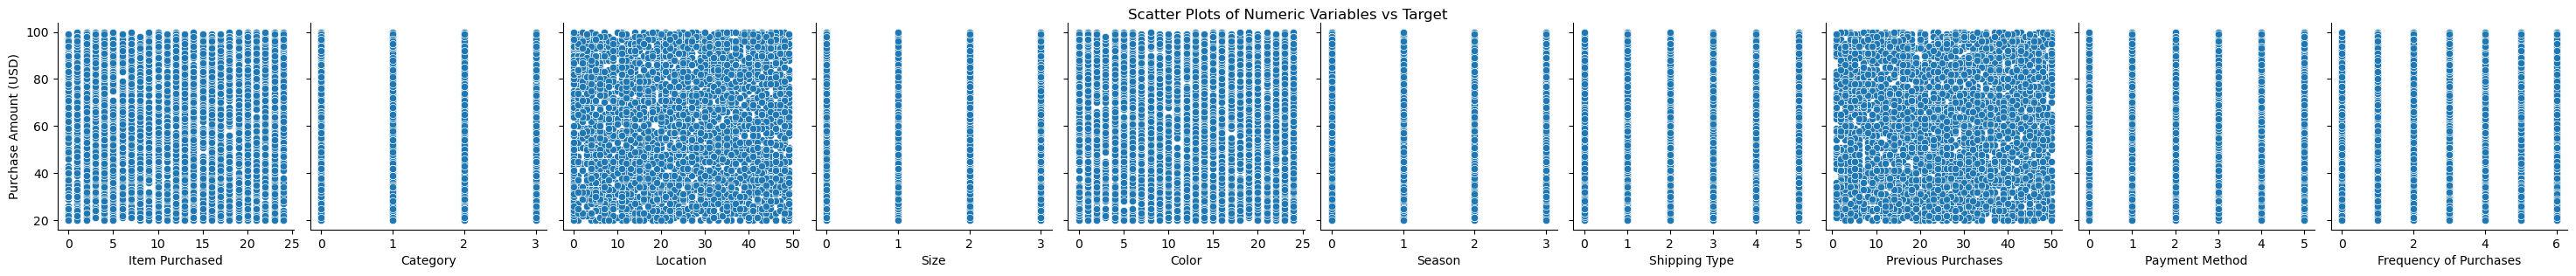

In [133]:
categorical_variables = ['Item Purchased', 'Category','Location', 'Size', 'Color', 'Season', 'Shipping Type', 'Previous Purchases', 'Payment Method',
       'Frequency of Purchases']
sns.pairplot(cd_edited, x_vars=categorical_variables, y_vars='Purchase Amount (USD)', height=3, aspect=1)
plt.suptitle('Scatter Plots of Numeric Variables vs Target', y=1.02)  
plt.show()

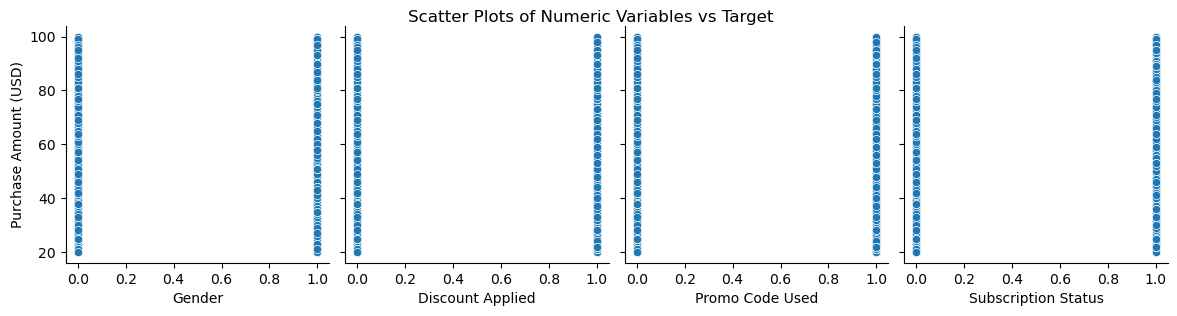

In [134]:
categorical_binary = ['Gender', 'Discount Applied', 'Promo Code Used', 'Subscription Status']
sns.pairplot(cd_edited, x_vars=categorical_binary, y_vars='Purchase Amount (USD)', height=3, aspect=1)
plt.suptitle('Scatter Plots of Numeric Variables vs Target', y=1.02)  
plt.show()

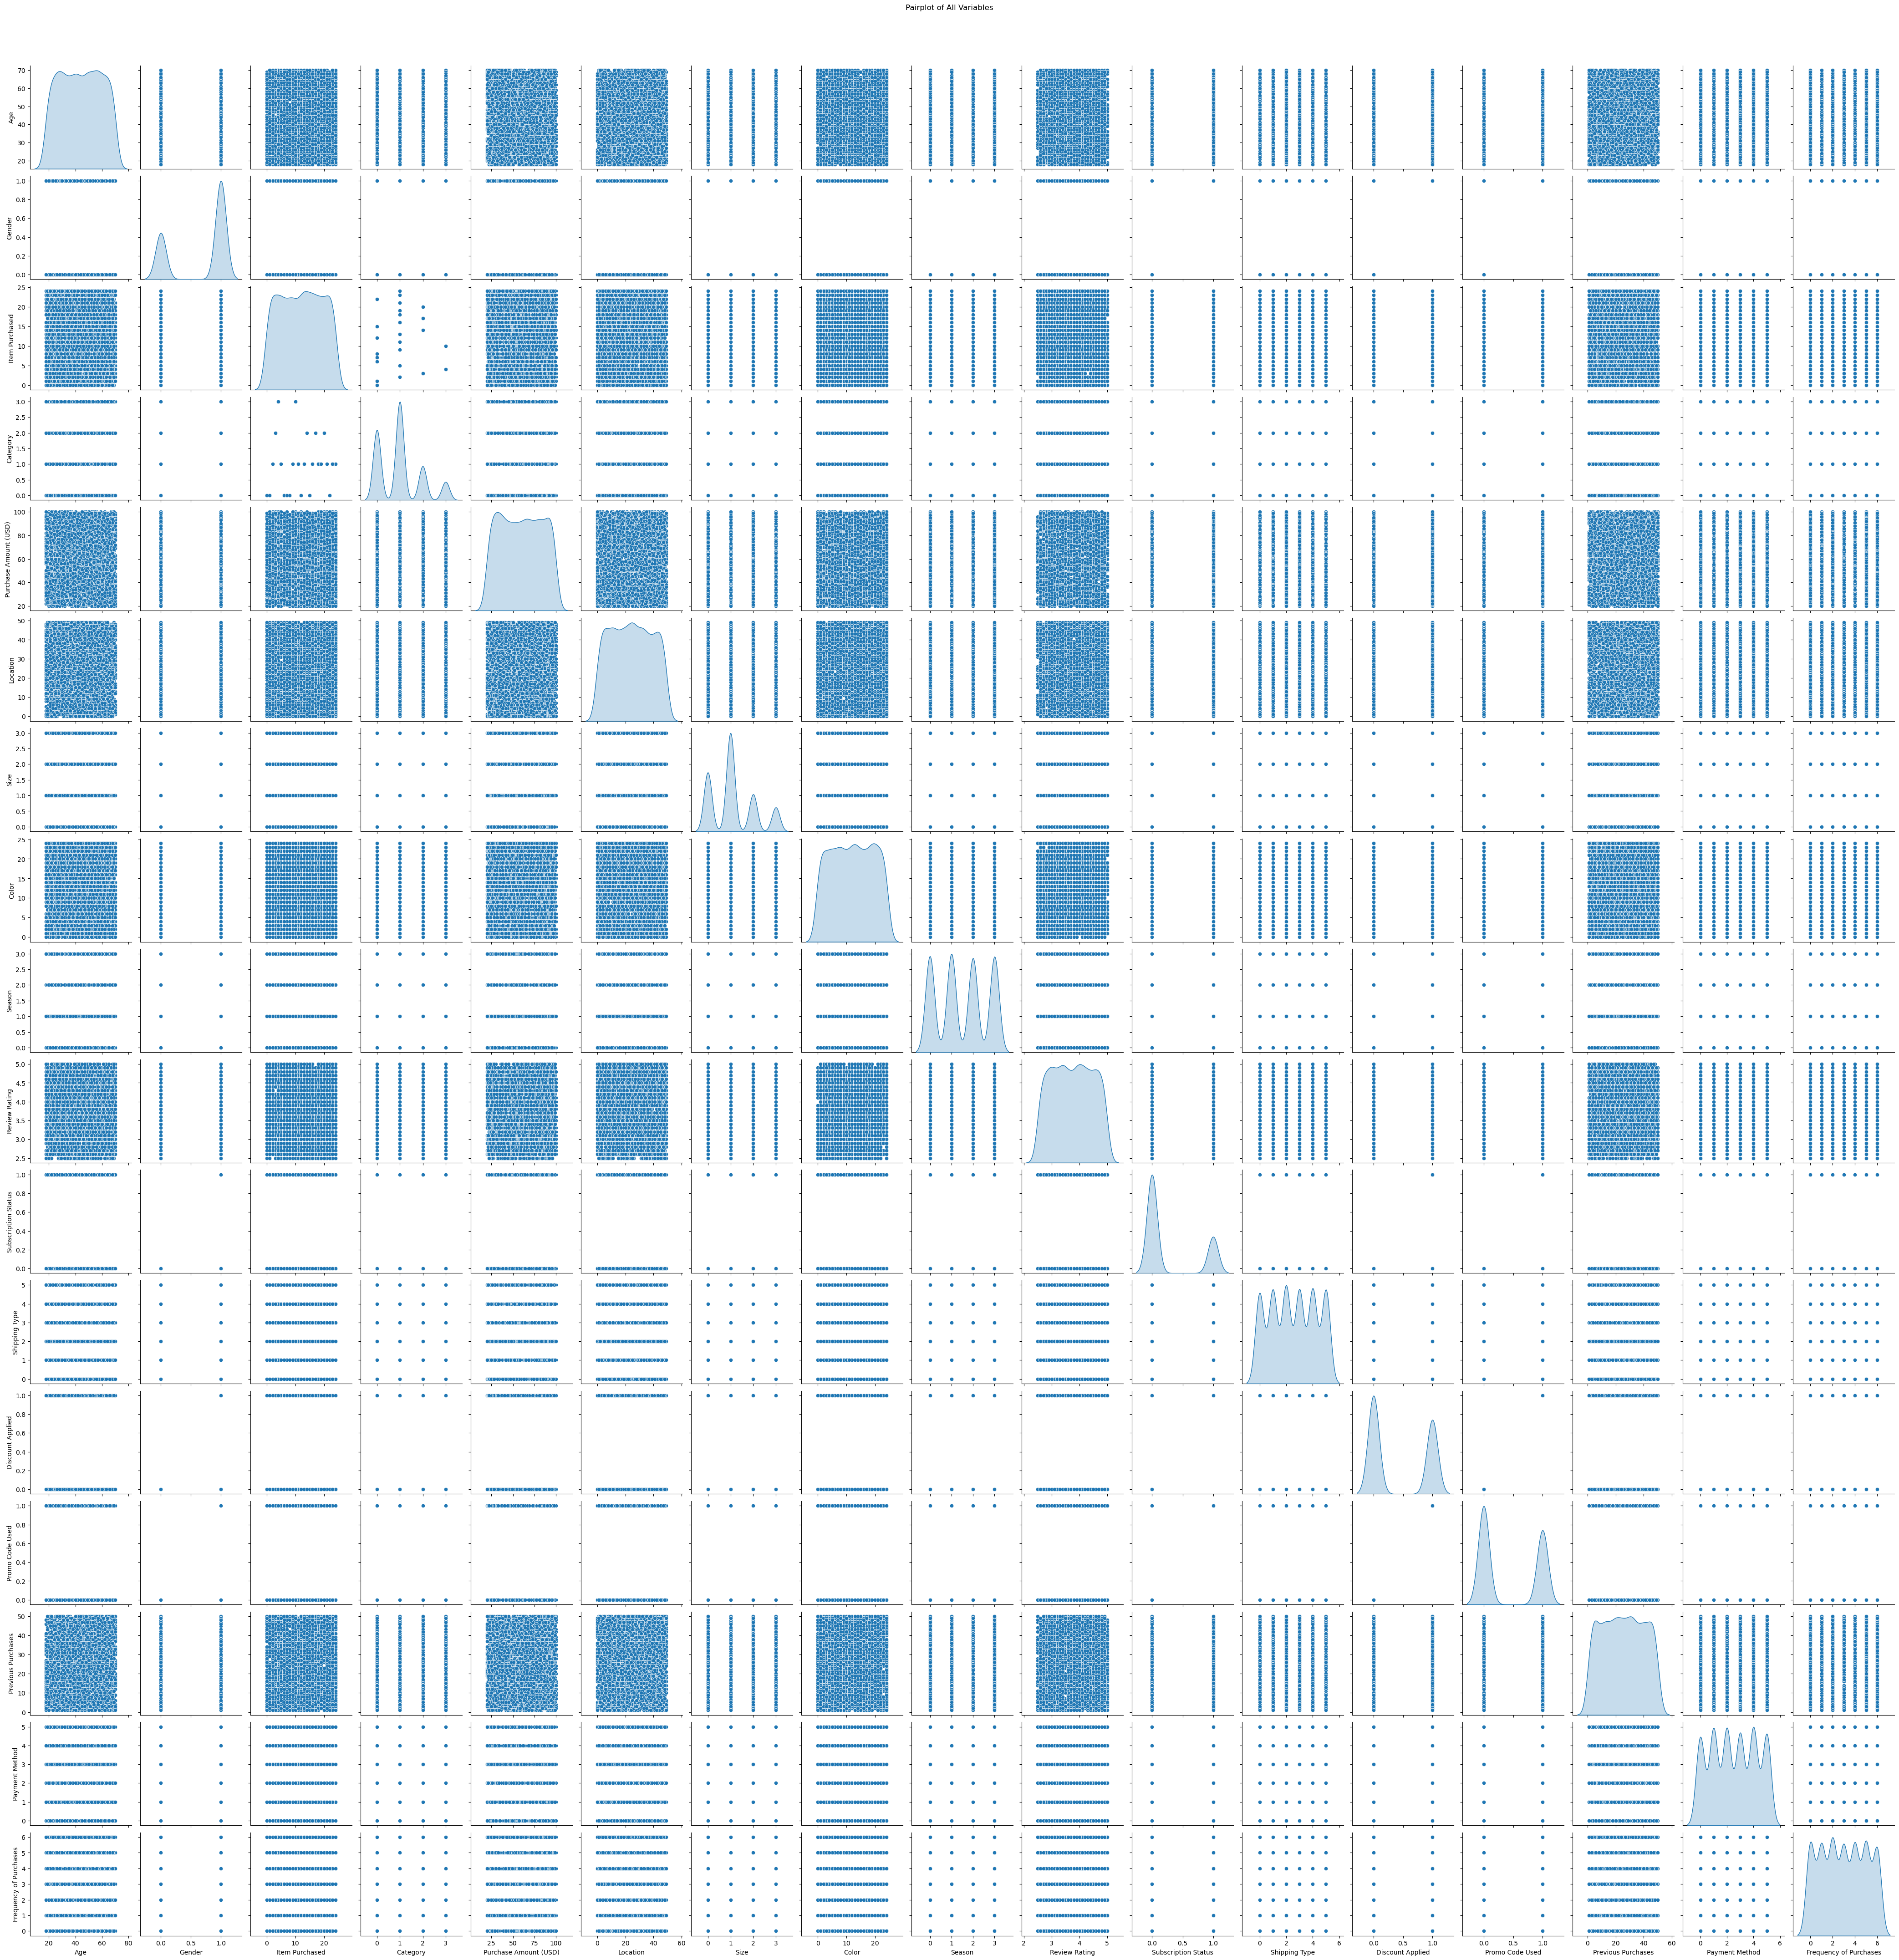

In [135]:
#using pairplot to visualize all variables
sns.pairplot(cd_edited, diag_kind='kde') 
plt.suptitle('Pairplot of All Variables', y=1.02)
plt.show()

Seems like there is no correlation with the target variable.

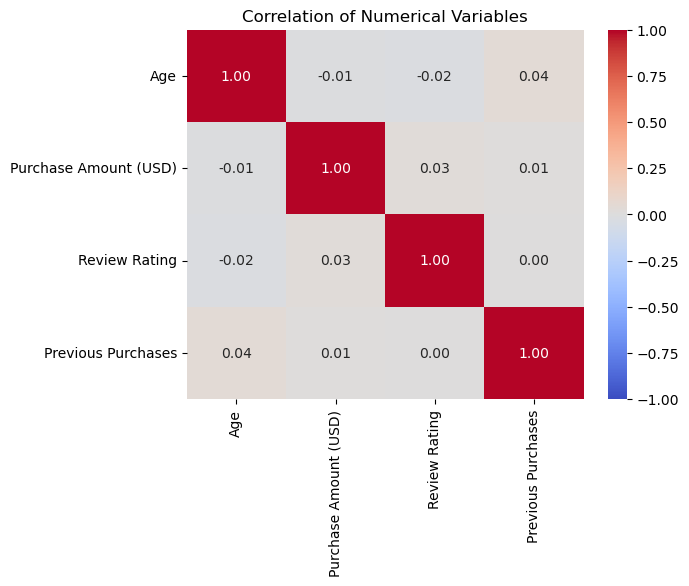

Age  Purchase Amount (USD)  Review Rating  \
Age                    1.000000              -0.010424      -0.021949   
Purchase Amount (USD) -0.010424               1.000000       0.030776   
Review Rating         -0.021949               0.030776       1.000000   
Previous Purchases     0.040445               0.008063       0.004229   

                       Previous Purchases  
Age                              0.040445  
Purchase Amount (USD)            0.008063  
Review Rating                    0.004229  
Previous Purchases               1.000000

In [136]:
#analyze correlation between categorical data using pair plots
numerical_vars = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
correlation_matrix = cd_edited[numerical_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin =-1, vmax = 1)
plt.title("Correlation of Numerical Variables")
plt.show()
correlation_matrix

In [137]:
#point biserial correlation for binary categorical variables against numeric continuous variables
categorical_binary = ['Gender', 'Discount Applied', 'Promo Code Used', 'Subscription Status']
correlations = {}

for var in categorical_binary:
    correlations[var] = pointbiserialr(cd_edited[var], cd_edited['Purchase Amount (USD)'])[0]

for var, corr in correlations.items():
    print(f' {var}: {corr}')


 Gender: -0.014044097963277647
 Discount Applied: -0.01779805469002164
 Promo Code Used: -0.01779805469002164
 Subscription Status: -0.006996040561289898


In [138]:
#one way anova for one continuous dependent variable and one or more categorical independent variables

results = {}

for variable in categorical_variables:
    # Group data by the categorical variable
    grouped_data = [group['Purchase Amount (USD)'].values for name, group in cd_edited.groupby(variable)]
    
    # Perform ANOVA
    f_statistic, p_value = f_oneway(*grouped_data)
    
    results[variable] = (f_statistic, p_value)

for variable, (f_statistic, p_value) in results.items():
    print(f'{variable}')
    print(f'  F-Statistic: {f_statistic:.4f}')
    print(f'  P-Value: {p_value:.4f}')

Item Purchased
  F-Statistic: 0.8042
  P-Value: 0.7354
Category
  F-Statistic: 1.4536
  P-Value: 0.2252
Location
  F-Statistic: 1.2722
  P-Value: 0.0973
Size
  F-Statistic: 1.5961
  P-Value: 0.1882
Color
  F-Statistic: 1.4659
  P-Value: 0.0666
Season
  F-Statistic: 3.7461
  P-Value: 0.0106
Shipping Type
  F-Statistic: 1.1241
  P-Value: 0.3451
Previous Purchases
  F-Statistic: 1.1157
  P-Value: 0.2697
Payment Method
  F-Statistic: 0.5395
  P-Value: 0.7465
Frequency of Purchases
  F-Statistic: 0.4070
  P-Value: 0.8749


In [139]:

vif_results = [(var, variance_inflation_factor(cd_edited.values, i)) for i, var in enumerate(cd_edited)]

for var, vif in vif_results:
    print(f'{var}: {vif}')

Age: 8.147612880618256
Gender: 4.782662489379603
Item Purchased: 3.68266011952499
Category: 2.217236958251208
Purchase Amount (USD): 6.735316458818577
Location: 3.7100079785570967
Size: 2.4107205788991384
Color: 3.6915226712798592
Season: 2.7205930227280164
Review Rating: 17.308076221017565
Subscription Status: 2.692810471796674
Shipping Type: 3.076755336297903
Discount Applied: inf
Promo Code Used: inf
Previous Purchases: 3.968353020154398
Payment Method: 3.1025882211339435
Frequency of Purchases: 3.1324412318358994


/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


 VIF results indicate significant multicollinearity issues in the dataset with Age, Review Rating, Discount Applied and Promo Code Used. These high values suggest a strong linear relationship with other variables, which could lead to unreliable coefficient estimates in the linear regression model. I should either remove or combine these variables. 

### Summary of Results

#### Not Significant:
- Item Purchased (ANOVA p-value: 0.7354)
- Category (ANOVA p-value: 0.2252)
- Shipping Type (ANOVA p-value: 0.3451)
- Previous Purchases (ANOVA p-value: 0.2697)
- Payment Method (ANOVA p-value: 0.7465)
- Frequency of Purchases (ANOVA p-value: 0.8749)
- Gender (Point Biserial correlation: -0.0140)
- Discount Applied (Point Biserial correlation: -0.0178)
- Promo Code Used (Point Biserial correlation: -0.0178)
- Subscription Status (Point Biserial correlation: -0.0070)

#### Weak Correlation:
- Age (Pearson correlation with Purchase Amount: -0.0104)
- Review Rating (Pearson correlation with Purchase Amount: 0.0308)
- Previous Purchases (Pearson correlation with Purchase Amount: 0.0081)

#### Significant:
- Location (ANOVA p-value: 0.0973)
- Size (ANOVA p-value: 0.1882)
- Color (ANOVA p-value: 0.0666)
- Season (ANOVA p-value: 0.0106)

Given so many week correlations, I will keep an eye out to drop these features after running a feature importance analysis on my model.

In [140]:
#define target and features
X = cd_edited.drop('Purchase Amount (USD)', axis = 1)
y = cd_edited['Purchase Amount (USD)']

#split into test/train groups
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

#initialize linear regression model
lr = LinearRegression()

#fit the model
lr.fit(x_train, y_train)

#make predictions on the test set
test_preds = lr.predict(x_test)

#evaluate the model

mse = mean_squared_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)

#get the feature coefficients to rank importance
importance = pd.DataFrame({'Feature': X.columns, 'Importance': lr.coef_})
importance['Importance'] = importance['Importance'].abs()
importance = importance.sort_values(by= 'Importance', ascending= False)
print("MSE:", mse)
print("R2:", r2)
importance


MSE: 557.613762459411
R2: 2.6713687460100388e-05


Feature  Importance
5                     Size    0.872980
8            Review Rating    0.733219
3                 Category    0.643833
11        Discount Applied    0.615695
12         Promo Code Used    0.615695
7                   Season    0.497701
9      Subscription Status    0.382228
10           Shipping Type    0.261944
14          Payment Method    0.149974
15  Frequency of Purchases    0.064362
1                   Gender    0.045534
4                 Location    0.043980
0                      Age    0.015858
2           Item Purchased    0.015793
13      Previous Purchases    0.014199
6                    Color    0.013222

In [141]:
print(importance)

                   Feature  Importance
5                     Size    0.872980
8            Review Rating    0.733219
3                 Category    0.643833
11        Discount Applied    0.615695
12         Promo Code Used    0.615695
7                   Season    0.497701
9      Subscription Status    0.382228
10           Shipping Type    0.261944
14          Payment Method    0.149974
15  Frequency of Purchases    0.064362
1                   Gender    0.045534
4                 Location    0.043980
0                      Age    0.015858
2           Item Purchased    0.015793
13      Previous Purchases    0.014199
6                    Color    0.013222


- Mean Squared Error (MSE) is a measure of the average squared differences between the predicted values and the actual values. It quantifies how well the model's predictions align with the actual data.Lower values are better; look for values as close to 0 as possible.

- R-squared (R²) is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables in the model. It indicates how well the model explains the variability of the target variable. A higher value indicates a better fit of the model. Values closer to 1 indicate a better fit, with values above 0.7 typically considered good in many contexts.

Since both MSE is high and R-square is low, I will drop these features due to low importance:
- Frequency of Purchases    0.064362
- Gender    0.045534
- Location    0.043980
- Age    0.015858
- Item Purchased    0.015793
- Previous Purchases    0.014199
- Color    0.013222


and also due to redudance and multicollinearity:
- Promo Code Used    0.615695


In [142]:
to_drop = ['Frequency of Purchases', 'Gender', 'Location', 'Age', 'Item Purchased', 'Previous Purchases', 'Color', 'Promo Code Used']
cd_edited.drop(columns=to_drop, inplace= True, axis=1)

In [143]:
#check for multicollinearity again
features = cd_edited.drop(columns = ['Purchase Amount (USD)']).columns

vif_results = [(var, variance_inflation_factor(cd_edited[features].values, i)) for i, var in enumerate(features)]

for var, vif in vif_results:
    print(f'{var}: {vif}')

Category: 2.170247833721505
Size: 2.3706564000847905
Season: 2.662933231279793
Review Rating: 8.135260455037905
Subscription Status: 2.690564553729588
Shipping Type: 3.002207312264024
Discount Applied: 3.411863062026279
Payment Method: 3.0311289271620274


In [146]:
#define target and features
X = cd_edited.drop('Purchase Amount (USD)', axis = 1)
y = cd_edited['Purchase Amount (USD)']

#split into test/train groups
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

#initialize linear regression model
lr = LinearRegression()

#fit the model
lr.fit(x_train, y_train)

#make predictions on the test set
test_preds = lr.predict(x_test)

#evaluate the model

mse = mean_squared_error(y_test, test_preds)
r2 = r2_score(y_test, test_preds)

#get the feature coefficients to rank importance
importance = pd.DataFrame({'Feature': X.columns, 'Importance': lr.coef_})
importance['Importance'] = importance['Importance'].abs()
importance = importance.sort_values(by= 'Importance', ascending= False)
print("MSE:", mse)
print("R2:", r2)
importance


MSE: 557.8033789892689
R2: -0.000313327174632283


Feature  Importance
6     Discount Applied    1.210289
1                 Size    0.867084
3        Review Rating    0.729241
0             Category    0.655112
2               Season    0.491065
4  Subscription Status    0.378459
5        Shipping Type    0.269457
7       Payment Method    0.153873

## Classification Models to predict the category of the item purchased (e.g., Backpack, Belt, etc.) based on customer features?

**Target variable:** Purchase_Made (binary: 1 if the customer made a purchase, 0 if not)

**Features (variables) used**
- Age: Numeric (scaled)
- Gender: One-hot encoded (e.g., Gender_Female, Gender_Male)
- Location: One-hot encoded (e.g., Location_CityA, Location_CityB, etc.)
- Size: Numeric (encoded as numeric values)
- Color: One-hot encoded (e.g., Color_Red, Color_Blue, etc.)
- Season: One-hot encoded (e.g., Season_Summer, Season_Winter, etc.)
- Review Rating: Numeric (scaled)
- Subscription Status: Binary (1 for subscribed, 0 for not)
- Shipping Type: One-hot encoded (e.g., ShippingType_2-Day, ShippingType_Express, etc.)
- Discount Applied: Binary (1 if a discount was applied, 0 if not)
- Promo Code Used: Binary (1 if a promo code was used, 0 if not)
- Previous Purchases: Numeric (scaled or left as numeric)
- Payment Method: One-hot encoded (e.g., PaymentMethod_CreditCard, PaymentMethod_PayPal, etc.)
- Frequency of Purchases: Converted to numeric and scaled (e.g., frequencies encoded as 1, 2, etc.)

## Models to try in order:

1. Start with logistic regression to establish a baseline.
2. Move on to random forest for its customizability and flexibility.
3. Finally, experiment with XGBoost to potentially achieve the best performance.

## Logistic Regression Model as a baseline

# step 1: define the features and target variable
X = new_df.drop(columns=['Item_Category'])  # features
y = new_df['Item_Category']  # target variable
# step 2: split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# step 3: initialize and train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
# step 4: make predictions
lr_predictions = lr_model.predict(X_test)

# step 5: evaluate the model
accuracy = accuracy_score(y_test, lr_predictions)
conf_matrix = confusion_matrix(y_test, lr_predictions)
class_report = classification_report(y_test, lr_predictions)

print(f'accuracy: {accuracy:.2f}')
print('confusion matrix:')
conf_matrix
print('classification report:')
class_report